<a href="https://colab.research.google.com/github/rahulsing/pytorch_demo/blob/master/6_Flowers_ResNet_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transfer Learning:** The practice of re-using a trained neural network that solves a similar problem to yours, freezing the lower layers and only re-training the higher layer

** re-using a trained neural network:** aviods buliding NN architeture from scratch, also saves on time and effort of re-training from scratch
 
**Solves a similar problem to yours **: example : language translation, image recognization are classic example
          
*   Existing Model trained for English to Spanish translation, may be possible to use this for Hindi to English translation

**Freezing the lower layers**: Reuse as-is without even changing the parameter weights


Higher layer are most specific to your use case, mostly likely the number of output varies for different use cases though the use case similar, so needs to be re-trained
 

---



**Benifits of Transfer Learning: **

"Ride on the shoulders of gaints"
*   NN architecture
*   Choice of initalization
*  Activation Funcation
*  Number and density of Layers


"Do more with less"
Make do more with less data
- English to French - Lots of traning data
- Hindi to French -  Little or no training data


"Faster and cheaper"
Training process is far faster, easier
-smaller training data
-only higher layer to train
-in a cloud-enabled world, less-time => less memory


---









Supports for several famous NN architecture

**torchvision.model**

-Alexnet

-VGG

-ResNet

-Inception

-...



In [0]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.0.0-{platform}-linux_x86_64.whl torchvision

**ResNet**


Big Inovation - "Skip Connection"

Connect output of lower layer to far-ahead higher layers

Model is forced to focus on what is not learnt by intermdiate layers

Residual Learning



In [0]:
import torch
from torchvision import datasets, models, transforms

In [39]:
!pip install Pillow==4.1.1

    100% |████████████████████████████████| 5.7MB 1.1MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
  [PIL]
You must restart the runtime in order to use newly installed versions.


In [0]:
# https://pytorch.org/docs/stable/torchvision/models.html
# Imgaes fed to pre-trained models have to be normalized using these paramerts
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

In [0]:
train_transform=transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
])

test_transform=transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
])

In [42]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import zipfile
zip=zipfile.ZipFile("/content/gdrive/My Drive/datasets/flowers_.zip")
zip.extractall("datasets")

In [44]:
!ls datasets
#data_dir=""

flowers_  __MACOSX


In [0]:
data_dir="datasets/flowers_"

In [0]:
image_datasets={}

In [0]:
image_datasets['train']=datasets.ImageFolder(data_dir+'/train',train_transform)

In [0]:
image_datasets['test']=datasets.ImageFolder(data_dir+'/test',test_transform)

In [50]:
print("Training data size - %d  " % len(image_datasets['train']))
print("Test data size - %d  " % len(image_datasets['test']))

Training data size - 3027  
Test data size - 1296  


In [52]:
class_names=image_datasets['train'].classes
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [53]:
image_datasets

{'test': Dataset ImageFolder
     Number of datapoints: 1296
     Root Location: datasets/flowers_/test
     Transforms (if any): Compose(
                              Resize(size=256, interpolation=PIL.Image.BILINEAR)
                              CenterCrop(size=(224, 224))
                              ToTensor()
                              Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                          )
     Target Transforms (if any): None, 'train': Dataset ImageFolder
     Number of datapoints: 3027
     Root Location: datasets/flowers_/train
     Transforms (if any): Compose(
                              Resize(size=256, interpolation=PIL.Image.BILINEAR)
                              RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
                              RandomHorizontalFlip(p=0.5)
                              ToTensor()
                              Normalize(mean=[0.485, 0.456,

In [0]:
dataloaders={}

In [0]:
dataloaders['train']=torch.utils.data.DataLoader(image_datasets['train'],batch_size=8,shuffle=True,num_workers=4)

In [0]:
dataloaders['test']=torch.utils.data.DataLoader(image_datasets['test'],batch_size=8,shuffle=True,num_workers=4)

In [57]:
dataloaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x7fc4e39b1160>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7fc4e39b1a20>}

In [0]:
inputs,labels=next(iter(dataloaders['train']))

In [59]:
inputs.shape

torch.Size([8, 3, 224, 224])

In [60]:
import torchvision
inp=torchvision.utils.make_grid(inputs)
inp.max()

tensor(2.6226)

In [61]:
import numpy as np
np.clip(inp,0,1).max()

tensor(1.)

In [62]:
inp.numpy().transpose((1,2,0)).shape

(228, 1810, 3)

In [0]:
import matplotlib.pyplot as plt
plt.ion()

In [0]:
def img_show(inp,title=None):
  inp=inp.numpy().transpose((1,2,0))
  inp=std+inp+mean
  inp=np.clip(inp,0,1)
  
  plt.figure(figsize=(16,4))
  plt.axis('off')
  plt.imshow(inp)
  
  if title is not None:
     plt.title(title)

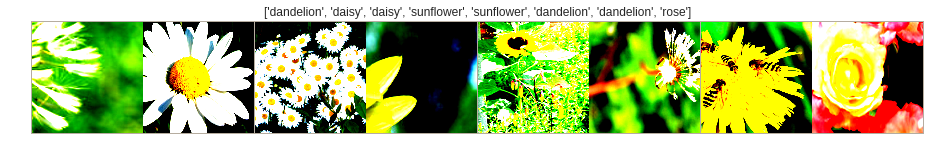

In [65]:
img_show(inp,title=[class_names[x] for x in labels])

In [68]:
#intation of resent18 pretrained model 
model=models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.torch/models/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:01<00:00, 32535960.13it/s]


In [73]:
#lets use the pretrained model architecture as-is, execpt adding last layer to work with linear data and replace the existing 
num_ftrs=model.fc.in_features # get the total no. of input feature that we need to pass into our last linear layer
num_ftrs 

512

In [0]:
 import torch.nn as nn

In [0]:
model.fc=nn.Linear(num_ftrs,5) # setting up linear layer that take 512 features as input and classify in 5 classes of output 

In [0]:
criterion=nn.CrossEntropyLoss()

In [0]:
# this is classification problem
# SGD optimizer with momemntum to accelerate model convergence

import torch.optim as optim

optimizer=optim.SGD(model.parameters(),lr=0.001,momentum=0.9)

In [0]:
# the learning rate scheduler which decays the learning rate as we get close to convergence
from torch.optim import lr_scheduler
exp_lr_scheduler=lr_scheduler.StepLR(optimizer,step_size=7,gamma=0.1)
#reduce learning rate by 0.1 every 7 epocs

In [0]:
def calculate_accuracy(phase,running_loss,running_corrects):
  epoch_loss=running_loss/len(image_datasets[phase])
  epoch_acc=running_corrects.double()/len(image_datasets[phase])
  
  print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase,epoch_loss,epoch_acc))
  return (epoch_loss,epoch_acc)

In [0]:
#criterion : cross entorpy loss
def phase_train(mode,criterion,optimizer,scheduler):
  scheduler.step() # update the learning rate for this epoc
  model.train() #will run the model in traning mode
  running_loss=0.0
  running_corrects=0 
  for inputs, labels in dataloaders['train']:
    optimizer.zero_grad()
    
    with torch.set_grad_enabled(True):
      outputs=model(inputs)
      _,preds=torch.max(outputs,1)
      loss=criterion(outputs,labels)
      loss.backward()
      optimizer.step()
    
    running_loss+=loss.item()*inputs.size(0)
    running_corrects+=torch.sum(preds==labels.data)
  calculate_accuracy('train',running_loss,running_corrects)

In [0]:
import copy

In [0]:
best_acc=0.0

In [0]:
#criterion : cross entorpy loss
def phase_test(mode,criterion,optimizer):
  mode.eval()
  running_loss=0.0
  running_corrects=0
  global best_acc
  
  for inputs,labels in dataloaders['test']:
    optimizer.zero_grad()
    with torch.no_grad():
      outputs=model(inputs)
      _,preds=torch.max(outputs,1)
      loss=criterion(outputs,labels)
      
      
    running_loss+=loss.item()*inputs.size(0)
    running_corrects+=torch.sum(preds==labels.data)
    
  epoc_loss,epoch_acc=calculate_accuracy('test',running_loss,running_corrects)
  
  if epoch_acc > best_acc:
    best_acc = epoch_acc
    best_model_wts=copy.deepcopy(model.state_dict())
  
  return best_model_wts      

In [0]:
def build_model(model,criterion,optimizer,scheduler,num_epochs=10):
  best_model_wts=copy.deepcopy(model.state_dict())
  
  for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch,num_epochs-1))
    print('-'*10)
    
    phase_train(model,criterion,optimizer,scheduler)
    
    best_model_wts=phase_test(model,criterion,optimizer)
    
    print()
  
  print('Best test Acc: {:.4f}'.format(best_acc))
  
  model.load_state_dict(best_model_wts)
  
  return model
                

In [133]:
model=build_model(model,criterion,optimizer,exp_lr_scheduler,num_epochs=1)

Epoch 0/0
----------
train Loss: 0.3438 Acc: 0.8797
test Loss: 0.3625 Acc: 0.8727

Best test Acc: 0.8727


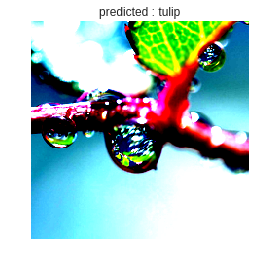

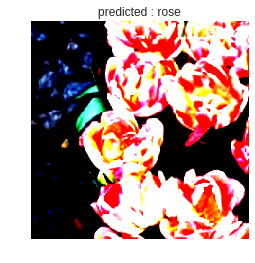

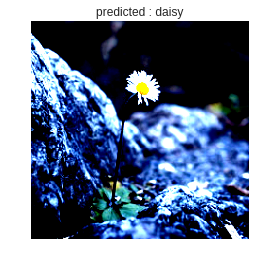

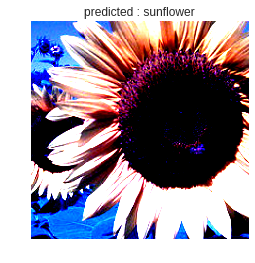

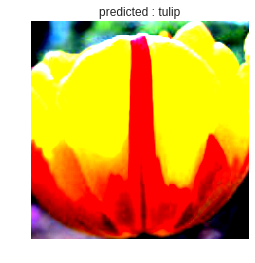

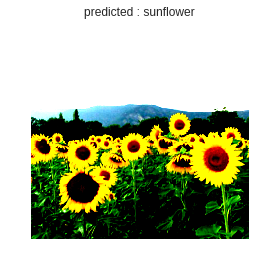

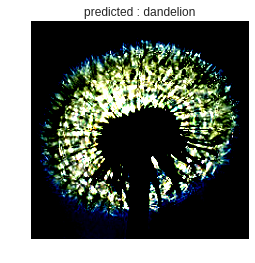

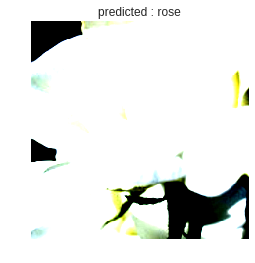

In [138]:
with torch.no_grad():
  inputs,labels=iter(dataloaders['test']).next()
  inp=torchvision.utils.make_grid(inputs)
  
  outputs=model(inputs)
  _,preds=torch.max(outputs,1)
  
  for j in range(len(inputs)):
    inp=inputs.data[j]
    img_show(inp,'predicted : '+class_names[preds[j]])
    
  

In [0]:
!mkdir -p /root/.kaggle

In [0]:
!cp /root/kaggle.json /root/.kaggle/

In [0]:
#https://stackoverflow.com/questions/49310470/using-kaggle-datasets-into-google-colab
from google.colab import files
files.upload()

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
mohansacharya/graduate-admissions                             Graduate Admissions                                   9KB  2018-12-28 10:07:14           3298  
karangadiya/fifa19                                            FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59           2759  
fivethirtyeight/fivethirtyeight-comic-characters-dataset      FiveThirtyEight Comic Characters Dataset            577KB  2019-01-13 15:02:19            464  
xvivancos/barcelona-data-sets                                 Barcelona data sets                                   1MB  2018-12-13 14:16:53            767  
anokas/kuzushiji                                    

In [0]:
!kaggle datasets list -s flower

No datasets found
